In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import researchpy as rp

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

In [38]:
#reading Dataset
df=pd.read_csv(r'D:\Dwiska\IYKRA\DFS Batch 5\4. Statistics\Fellowship-5-main\epl_1819.csv',sep=',')

In [39]:
df.head(3)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6


# 1. Whether this data is clean?

In [40]:
# checking missing values, columns type, row numbers and column numbers
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

(20, 44)

In [41]:
df.drop_duplicates(subset = 'Team')
df.shape

(20, 44)

### Because there are incompatibility data type for column 'attack_passes','attack_passes_long','attack_passes_back','defence_clearances', so the data set is not clear and we should change its data type first

In [42]:
df['attack_passes']

0     26,581
1     23,638
2     25,070
3     21,295
4     20,805
5     19,202
6     16,618
7     16,494
8     17,219
9     16,358
10    15,462
11    15,243
12    13,490
13    15,943
14    13,011
15    14,297
16    14,109
17    10,226
18    17,699
19    15,902
Name: attack_passes, dtype: object

In [43]:
df['attack_passes']=df['attack_passes'].str.replace(',','')
df['attack_passes_long']=df['attack_passes_long'].str.replace(',','')
df['attack_passes_back']=df['attack_passes_back'].str.replace(',','')
df['defence_clearances']=df['defence_clearances'].str.replace(',','')
df['attack_passes'].dtype
df['attack_passes_long'].dtype
df['attack_passes_back'].dtype
df['defence_clearances'].dtype
df['attack_passes'] = pd.to_numeric(df['attack_passes'])
df['attack_passes_long']= pd.to_numeric(df['attack_passes_long'])
df['attack_passes_back']= pd.to_numeric(df['attack_passes_back'])
df['defence_clearances']= pd.to_numeric(df['defence_clearances'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

# Type of Features

## Categorical Features: 
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Category
    

## Ordinal Features: 
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: general_league_position
    

## Continuous Features: 
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continuous Features in the dataset: all columns except team, category and general_league_position
    

# Analyzing The Features

In [66]:
df.groupby(['category'])['Team'].count()



category
Champions League                   2
Champions League Qualification     2
Europa League                      2
Europa League Qualification        1
No UEFA Competitions              10
Relegated                          3
Name: Team, dtype: int64

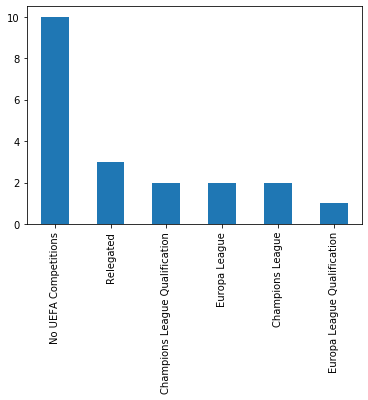

In [67]:
df.category.value_counts().plot(kind='bar')

# 2. How is the point distribution of the epl team? and which team is an anomaly?

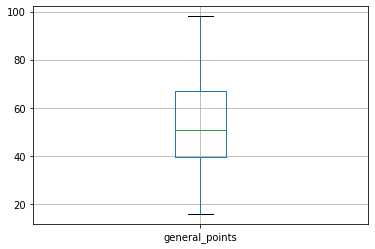

In [65]:
boxplot = df.boxplot(column=['general_points'])

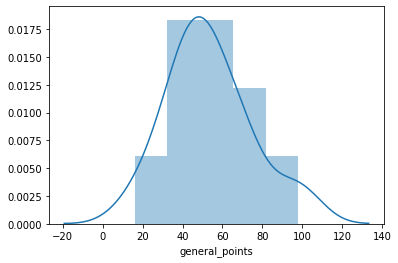

In [68]:
sns.distplot(df['general_points'])

In [76]:
df['general_points'].describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

In [44]:
from scipy import stats
stats.mode(df['general_points'])

ModeResult(mode=array([45], dtype=int64), count=array([2]))

# 3. Which team has the best attack?

In [52]:
# 3. calculated best attack by deviding attack_scored with general_match_played
df['attack'] = df['attack_scored']/df['general_matches_played']

In [57]:
df[['Team','attack']].sort_values(by='attack', ascending=False)

,Team,attack
0,Manchester City,2.500000
1,Liverpool,2.342105
4,Arsenal,1.921053
3,Tottenham,1.763158
5,Manchester United,1.710526
2,Chelsea,1.657895
13,Bournemouth,1.473684
7,Everton,1.421053
9,West Ham,1.368421
10,Watford,1.368421


# 4. Which team has the best defence?

In [59]:
df['defence'] = df['defence_goals_conceeded']/df['general_matches_played']

In [60]:
df[['Team','defence']].sort_values(by='defence', ascending=True)

,Team,defence
1,Liverpool,0.578947
0,Manchester City,0.605263
2,Chelsea,1.026316
3,Tottenham,1.026316
6,Wolverhampton,1.210526
7,Everton,1.210526
8,Leicester,1.263158
12,Newcastle,1.263158
4,Arsenal,1.342105
11,Crystal Palace,1.394737


# 5. Which team is good in financial aspect?

### The team with good financial aspect should have high market values and high average money allotted from the TV rights deal.

In [86]:
df['finance'] = (df['finance _tv_revenue']/df['finance _live_games_televised']) + df['finance _team_market']

In [87]:
df[['Team','finance']].sort_values(by='finance', ascending=False)

,Team,finance
0,Manchester City,1.009007e+09
1,Liverpool,8.416960e+08
2,Chelsea,7.853012e+08
3,Tottenham,7.408258e+08
4,Arsenal,7.074877e+08
5,Manchester United,5.557183e+08
6,Wolverhampton,3.780777e+08
7,Everton,3.125047e+08
8,Leicester,2.924619e+08
9,West Ham,2.418700e+08


In [89]:
finance_percentile_80 = np.percentile(df[['finance']],80)
print('finance Percentile 80 is',round(finance_percentile_80,2))
df[df['finance']>=finance_percentile_80][['Team',"finance"]].sort_values('finance',ascending=False)

finance Percentile 80 is 714155341.77


,Team,finance
0,Manchester City,1.009007e+09
1,Liverpool,8.416960e+08
2,Chelsea,7.853012e+08
3,Tottenham,7.408258e+08


### According to pareto rules, Manchester City, Liverpool, Chelsea and Tottenham can be classified as the teams with good financial aspects

# EXPLORE THE CREATIVITY !

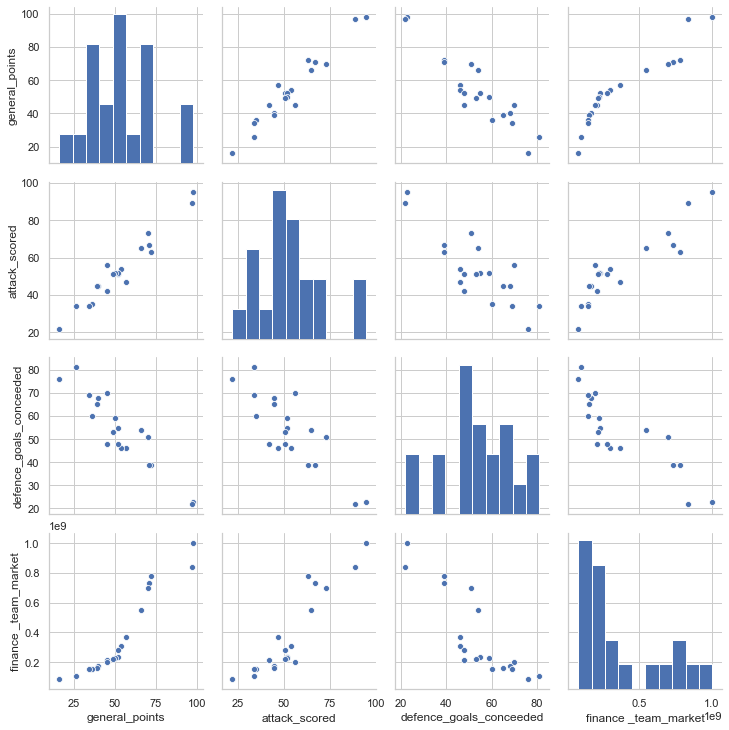

In [102]:
sns.pairplot(data=df[['general_points','attack_scored','defence_goals_conceeded','finance _team_market']])
plt.show()